# `Netflix Dataset Details`

In this work, exploratory data analysis has been carried out on Netflix movies and TV shows Dataset.

Feature Details:

`Type` - The category of a show, can be either a Movie or a TV Show

`Title` - Name of the show

`Director` - Name of the director(s) of the show

`Cast` - Name of the actors

`Country` - Name of countries the show is available to watch on Netflix

`Date Added` - Date when the show was added on Netflix

`Rating` - Show rating on Netflix

`Release Year` - The release year of the show

`Duration` - Time duration of the show

`Listed In` - Genre of the show
    
Insights: 

1. What type of content is added over the years?
2. What are the most popular content and ratings in India?
3. What is the title of the longest movie duration and in which year it was released?    

## `Importing Libraries and Loading Dataset`

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv("netflix_dataset.csv")

df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,TV Show,3%,NaN,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,"August 14, 2020",2020,TV-MA,4 Seasons,"International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...
1,s2,Movie,7:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,"December 23, 2016",2016,TV-MA,93 min,"Dramas, International Movies",After a devastating earthquake hits Mexico Cit...
2,s3,Movie,23:59,Gilbert Chan,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,"December 20, 2018",2011,R,78 min,"Horror Movies, International Movies","When an army recruit is found dead, his fellow..."
3,s4,Movie,9,Shane Acker,"Elijah Wood, John C. Reilly, Jennifer Connelly...",United States,"November 16, 2017",2009,PG-13,80 min,"Action & Adventure, Independent Movies, Sci-Fi...","In a postapocalyptic world, rag-doll robots hi..."
4,s5,Movie,21,Robert Luketic,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",United States,"January 1, 2020",2008,PG-13,123 min,Dramas,A brilliant group of students become card-coun...


In [2]:
print("The shape of the Netflix Dataset is", df.shape)

The shape of the Netflix Dataset is (7787, 12)


### Describing the Dataset

In [3]:
print(df.describe())

       release_year
count   7787.000000
mean    2013.932580
std        8.757395
min     1925.000000
25%     2013.000000
50%     2017.000000
75%     2018.000000
max     2021.000000


This shows that there is only 1 numeric column in our Dataset.

### Checking Datatype of each column

In [4]:
print(df.dtypes)

show_id         object
type            object
title           object
director        object
cast            object
country         object
date_added      object
release_year     int64
rating          object
duration        object
listed_in       object
description     object
dtype: object


### Checking for Null Values

In [5]:
print(df.isnull().sum())

show_id            0
type               0
title              0
director        2389
cast             718
country          507
date_added        10
release_year       0
rating             7
duration           0
listed_in          0
description        0
dtype: int64


## `Data Cleaning and Formatting`

### Handling Null Values
We saw that there are some columns for which there are some null values present. Now, we will remove the null values and replace them with some meaningful data.

For `cast` and `director` columns, we will replace null values with "No Data". As these have large number of null values present.

Next, we will replace `country`, `date_added` and `rating` with the mode of the column. 

Again printing the number of null values in each column. This time each column should have zero null values present.

In [6]:
df["director"].fillna("No Data", inplace = True)
df["cast"].fillna("No Data", inplace = True)

df["country"].fillna(df["country"].mode()[0], inplace = True)
df["date_added"].fillna(df["date_added"].mode()[0], inplace = True)
df["rating"].fillna(df["rating"].mode()[0], inplace = True)

print(df.isnull().sum())

show_id         0
type            0
title           0
director        0
cast            0
country         0
date_added      0
release_year    0
rating          0
duration        0
listed_in       0
description     0
dtype: int64


### Correcting Date formats

In [7]:
df["date_added"] = pd.to_datetime(df["date_added"])
df["year_added"] = df['date_added'].dt.year

## `Data Analysis and Visualization`

### Checking Percentage of TV shows and Movies

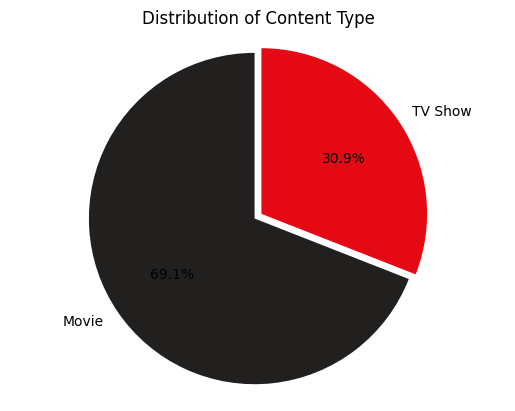

In [8]:
type_show = df["type"].value_counts()
show = type_show.index
count = type_show.values

explode = (0, 0.05)
color = ["#221f1f", "#E50914"]

plt.pie(count, labels = show, autopct = "%.1f%%", colors = color, explode = explode, startangle = 90)
plt.axis("equal")
plt.title("Distribution of Content Type")

plt.show()

### Top 10 Countries with the most content

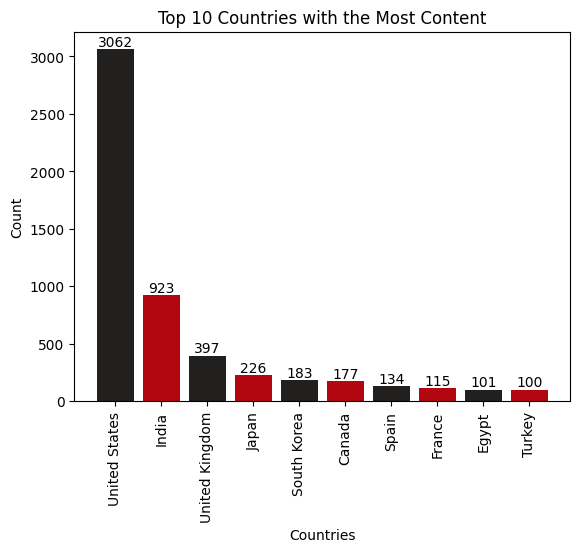

In [9]:
top_10 = df["country"].value_counts().head(10)
countries = top_10.index
show_count = top_10.values

colors = ["#221f1f" if i % 2 == 0 else "#b20710" for i in range(len(countries))]

plt.bar(countries, show_count, color = colors)
plt.xticks(rotation = 90)
plt.title("Top 10 Countries with the Most Content")
plt.xlabel("Countries")
plt.ylabel("Count")

for i, v in enumerate(show_count):
    plt.text(i, v, str(v), ha = "center", va = "bottom")

plt.show()

### Content added over years

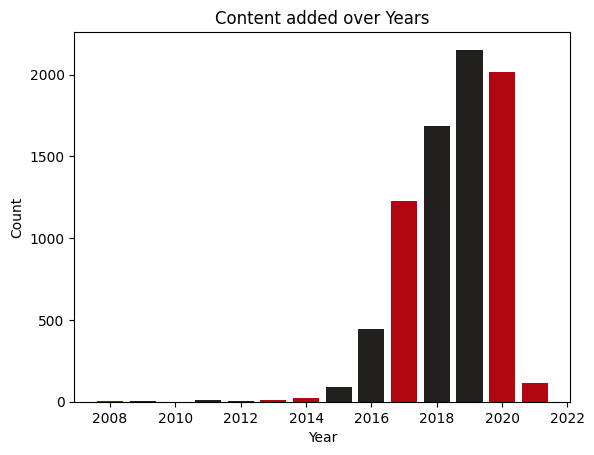

In [10]:
most_cont = df["year_added"].value_counts()
year = most_cont.index
value = most_cont.values

colors = ["#221f1f" if i % 2 == 0 else "#b20710" for i in range(len(year))]

plt.bar(year, value, color = colors)
plt.title("Content added over Years")
plt.xlabel("Year")
plt.ylabel("Count")
    
plt.show()

### Most Popular Content in India

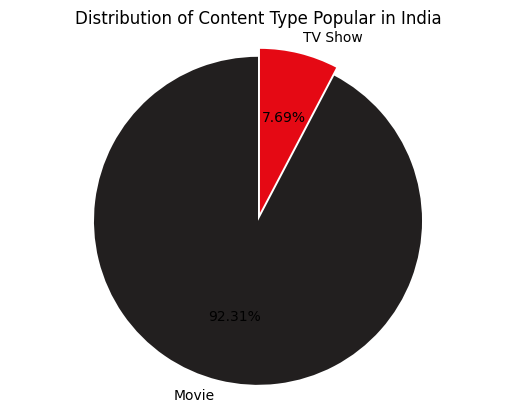

In [11]:
india = df[df["country"] == "India"]

cont_type = india["type"].value_counts()
cont_name = cont_type.index
cont_value = cont_type.values

explode = (0, 0.05)
color = ["#221f1f", "#E50914"]

plt.pie(cont_value, labels = cont_name, autopct = "%.2f%%", colors = color, explode = explode, startangle = 90)
plt.axis("equal")
plt.title("Distribution of Content Type Popular in India")

plt.show()

### Most Popular Ratings in India

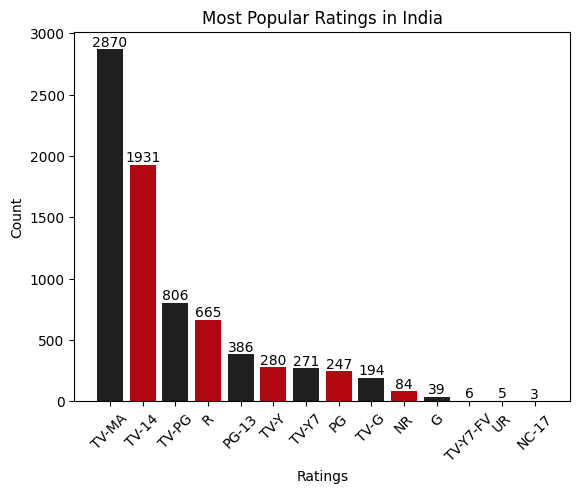

In [12]:
rat_type = df["rating"].value_counts()
rat_name = rat_type.index
rat_value = rat_type.values

colors = ["#221f1f" if i % 2 == 0 else "#b20710" for i in range(len(rat_name))]

plt.bar(rat_name, rat_value, color = colors)
plt.xticks(rotation = 45)
plt.title("Most Popular Ratings in India")
plt.xlabel("Ratings")
plt.ylabel("Count")

for i, v in enumerate(rat_value):
    plt.text(i, v, str(v), ha = "center", va = "bottom")

plt.show()

### Longest Movie Duration

In [13]:
df_movie = df[df['type'] == 'Movie'].copy()

df_movie['duration_value'] = df_movie['duration'].str.split().str[0].astype(int)

df_movie = df_movie[df_movie['duration_value'] == df_movie['duration_value'].max()]

movie_name = df_movie['title'].iloc[0]
year = df_movie['release_year'].iloc[0]

print(movie_name, "is the movie with the longest duration, released in the year", year)

Black Mirror: Bandersnatch is the movie with the longest duration, released in the year 2018
